In [ ]:
def preprocess(image, mask, target_size=(256, 256)):
    # Resize image and mask
    image = resize(image, target_size + (image.shape[2],), anti_aliasing=True)
    mask = resize(mask, target_size, anti_aliasing=False)

    # Normalize image
    image_min = image.min()
    image_max = image.max()
    image = (image - image_min) / (image_max - image_min + 1e-8)


    mask = (mask > 0.5).astype(np.float32)

    return image, mask

def get_image_mask_paths(directory):
    image_paths = []
    mask_paths = []

    for filename in os.listdir(directory):
        if filename.endswith("_image.tif"):
            image_paths.append(os.path.join(directory, filename))
        elif filename.endswith("_label.tif"):
            mask_paths.append(os.path.join(directory, filename))


    image_paths.sort()
    mask_paths.sort()

    return image_paths, mask_paths

# Get paths for train and test datasets
train_image_paths, train_mask_paths = get_image_mask_paths(TRAIN_DIR)
test_image_paths, test_mask_paths = get_image_mask_paths(TEST_DIR)



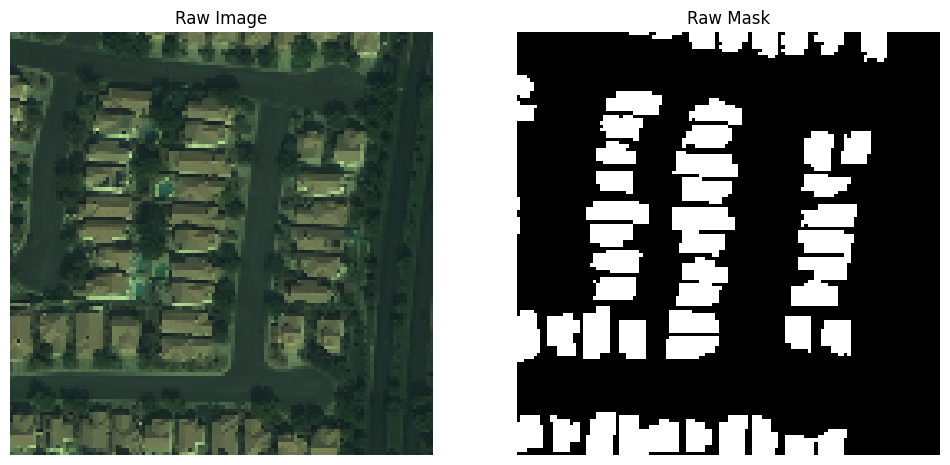

In [7]:
sample_image_path = train_image_paths[0]
sample_mask_path = train_mask_paths[0]
image, mask = load_data(sample_image_path, sample_mask_path)

# Display raw data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Raw Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Raw Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.show()

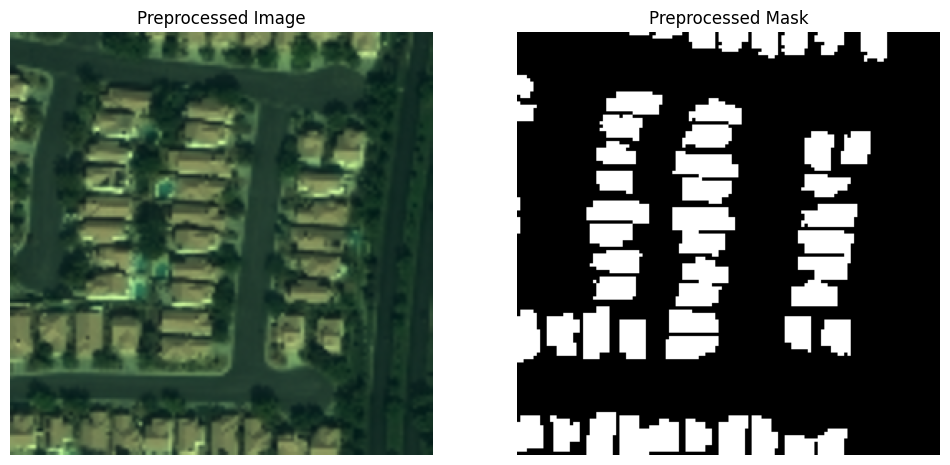

In [8]:
# Preprocess the sample image and mask
preprocessed_image, preprocessed_mask = preprocess(image, mask, target_size=(256, 256))

# Display preprocessed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Preprocessed Image")
plt.imshow(preprocessed_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Preprocessed Mask")
plt.imshow(preprocessed_mask, cmap='gray')
plt.axis('off')

plt.show()